# Dominos Sales Data Analysis from 2015-12-03 to 2015-12-15

In the following code, I Analyzed the following:

1. Quantities of pizzas sold on Each Date
2. Quantities of pizzas  Purchased in Each Branch
3. Total sales for each category
4. Total sales for each pizza sold
5. Total sales for each branch
6. Total sales for each day
7. Managers with the highest Sales
8. How many Quantities were sold on each day per Branch?
9. What type of Pizza was purchased more at each Branch?
10. Total sales for each category in each branch
11. Total sales for each pizza sold in each branch
12. Total sales for each day in each branch


At the end of this notebook are my findings from the analysis done.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
plt.tight_layout()

<Figure size 576x396 with 0 Axes>

In [2]:
data= pd.read_excel(r'Sales-Data.xlsx',sheet_name='Sales Data')
data.head()

,S/N,Date,Branch,Pizza Sold,Category,Price,Quantity,Time,Time Range
0,1,2015-12-11,Ibadan,Meatzaa,Beef,2000,5,08:00:01,Before 9:00am
1,2,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,4,08:00:02,Before 9:00am
2,3,2015-12-04,Lekki,BBQ Chicken,Chicken,4000,5,08:00:04,Before 9:00am
3,4,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,1,08:00:07,Before 9:00am
4,5,2015-12-07,Gbagada,Meatzaa,Beef,2000,4,08:00:08,Before 9:00am


In [3]:
data.dtypes

S/N                    int64
Date          datetime64[ns]
Branch                object
Pizza Sold            object
Category              object
Price                  int64
Quantity               int64
Time                  object
Time Range            object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   S/N         5000 non-null   int64         
 1   Date        5000 non-null   datetime64[ns]
 2   Branch      5000 non-null   object        
 3   Pizza Sold  5000 non-null   object        
 4   Category    5000 non-null   object        
 5   Price       5000 non-null   int64         
 6   Quantity    5000 non-null   int64         
 7   Time        5000 non-null   object        
 8   Time Range  5000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 351.7+ KB


In [5]:
data['Quantity'].unique()

array([5, 4, 1, 2, 3], dtype=int64)

In [6]:
data.columns

Index(['S/N', 'Date', 'Branch', 'Pizza Sold', 'Category', 'Price', 'Quantity',
       'Time', 'Time Range'],
      dtype='object')

In [7]:
# Checking the number of rows
data.index

RangeIndex(start=0, stop=5000, step=1)

In [8]:
# Checking the sum of null values in each columns
data.isnull().sum()

S/N           0
Date          0
Branch        0
Pizza Sold    0
Category      0
Price         0
Quantity      0
Time          0
Time Range    0
dtype: int64

In [9]:
#converting strings to time without date
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')- pd.to_datetime(data['Time'], format='%H:%M:%S').dt.normalize()

In [10]:
data['Time'][0]

Timedelta('0 days 08:00:01')

In [11]:
data['Time'].value_counts()

0 days 09:39:42    6
0 days 09:02:47    5
0 days 08:50:46    5
0 days 09:23:55    5
0 days 09:16:03    5
                  ..
0 days 08:46:14    1
0 days 08:46:15    1
0 days 08:46:18    1
0 days 08:46:25    1
0 days 09:42:33    1
Name: Time, Length: 3356, dtype: int64

In [12]:
#To convert datetime to string
data['Date']=data['Date'].astype('str')

In [13]:
#Creating a new column for sales per entry
data['Sales'] = data['Price'] * data['Quantity']

In [14]:
data.head()

,S/N,Date,Branch,Pizza Sold,Category,Price,Quantity,Time,Time Range,Sales
0,1,2015-12-11,Ibadan,Meatzaa,Beef,2000,5,0 days 08:00:01,Before 9:00am,10000
1,2,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,4,0 days 08:00:02,Before 9:00am,8000
2,3,2015-12-04,Lekki,BBQ Chicken,Chicken,4000,5,0 days 08:00:04,Before 9:00am,20000
3,4,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,1,0 days 08:00:07,Before 9:00am,2000
4,5,2015-12-07,Gbagada,Meatzaa,Beef,2000,4,0 days 08:00:08,Before 9:00am,8000


## 1. Quantities of pizza sold on Each Date

In [15]:
# Create a function that plots a barplot
def plot_a_barplot(data, x, y, title):
    
    data = data
    col1 = x
    col2 = y
        
    fig = plt.figure(figsize=(15,7))
    ax = sns.barplot(x=data[col1], y=data[col2], palette='viridis')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
    for p in ax.patches:
        ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                    ,ha='center',va='center',xytext=(0,10),textcoords='offset points',rotation=20,fontsize=10)
    plt.title(title,fontsize=16,weight='bold')
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

In [16]:
# a function that creates a groupby
def a_groupby(data,col1,col2):
    new_df = data.groupby(col1)[col2].sum().reset_index()
    return new_df

In [17]:
quantity_sold_per_day = a_groupby(data,'Date','Quantity')

In [18]:
quantity_sold_per_day

,Date,Quantity
0,2015-12-03,1165
1,2015-12-04,1155
2,2015-12-05,1231
3,2015-12-06,1239
4,2015-12-07,1183
5,2015-12-08,1126
6,2015-12-09,1121
7,2015-12-10,1104
8,2015-12-11,1190
9,2015-12-12,1205


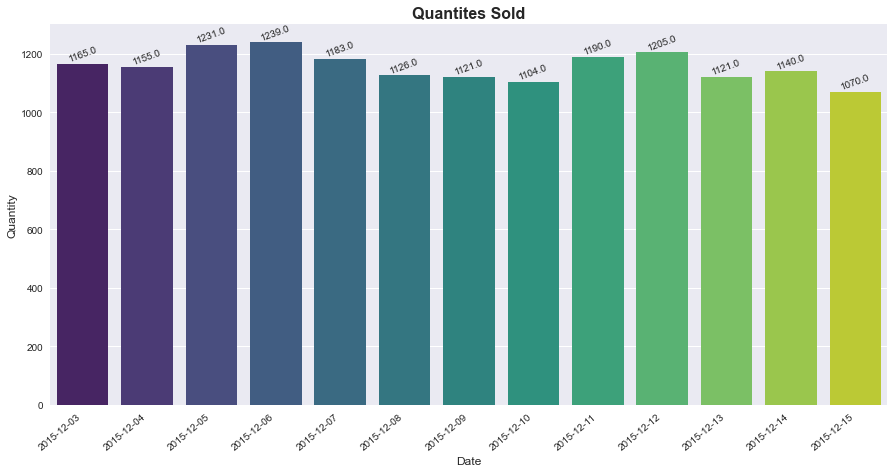

In [19]:
plot_a_barplot(quantity_sold_per_day,'Date','Quantity','Quantites Sold')

## 2. Quantities of Pizza Purchased in Each Branch

In [20]:
quantity = a_groupby(data,'Branch','Quantity')

In [21]:
quantity

,Branch,Quantity
0,Gbagada,3113
1,Ibadan,3012
2,Ikoyi,3118
3,Lekki,2943
4,Surulere,2864


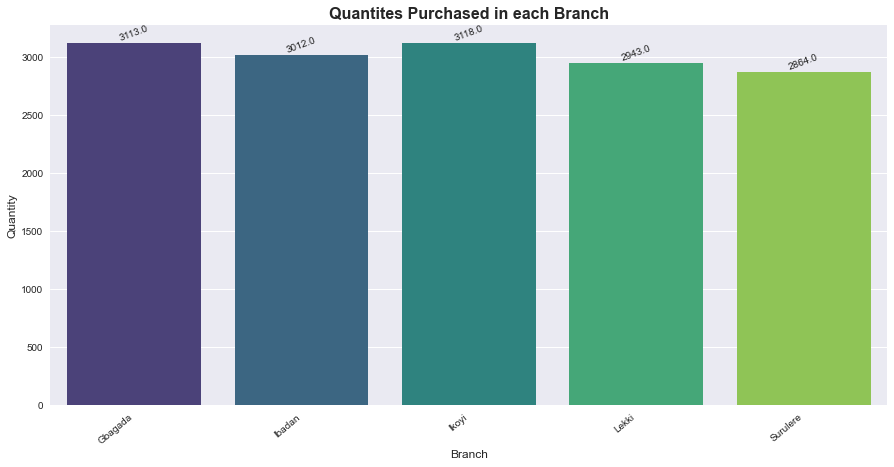

In [22]:
plot_a_barplot(quantity, 'Branch', 'Quantity', 'Quantites Purchased in each Branch')

## 3. Total sales for Each Category of Pizza

In [23]:
category_sales = a_groupby(data,'Category','Sales')

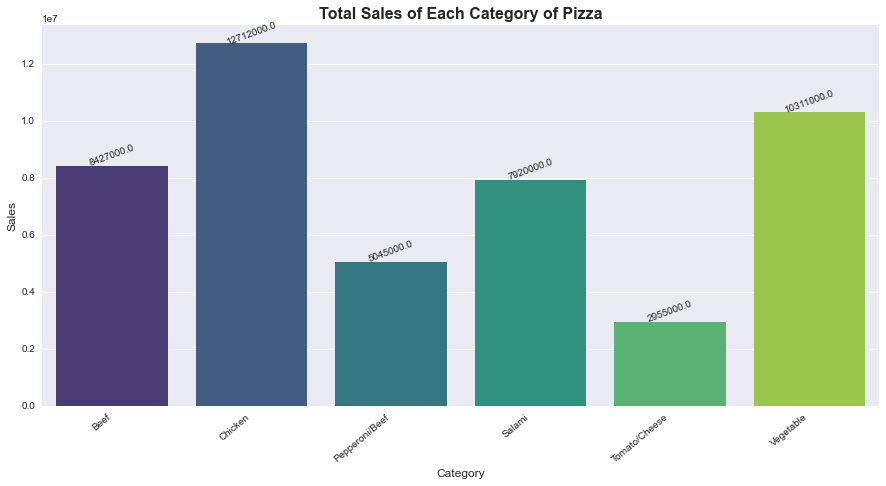

In [24]:
plot_a_barplot(category_sales, 'Category','Sales','Total Sales of Each Category of Pizza')

## 4. Total sales for Each Pizza Sold

In [25]:
pizza_sales = a_groupby(data,'Pizza Sold','Sales')

In [26]:
pizza_sales

,Pizza Sold,Sales
0,BBQ Chicken,3600000
1,BBQ Philly Steak,3808000
2,Beef Suya,2943000
3,Chicken Bali,1778000
4,Chicken Feast,1744000
5,Chicken Legend,1766000
6,Chicken Suya,3824000
7,Extravaganza,1814000
8,Hot Pepperoni Feast,4292000
9,Hot Veggie,3800000


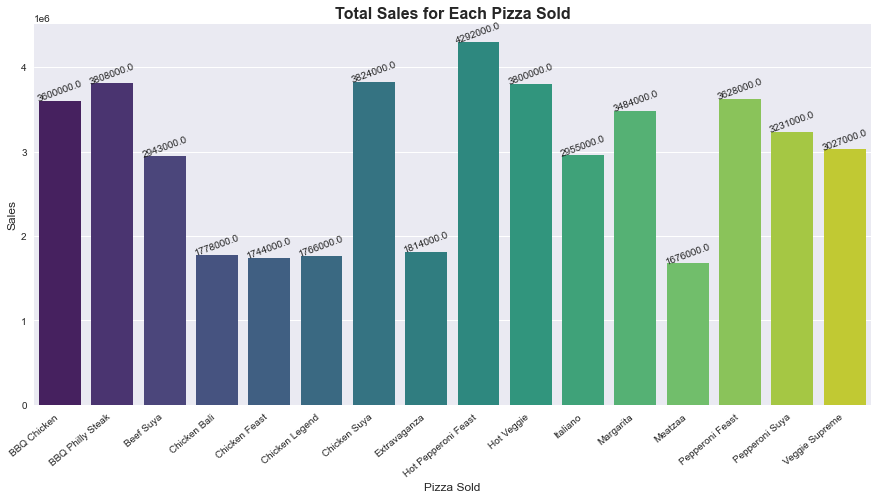

In [27]:
plot_a_barplot(pizza_sales,'Pizza Sold','Sales','Total Sales for Each Pizza Sold')

## 5. Total sales for Each Branch

In [28]:
branch_sales = a_groupby(data,'Branch','Sales')

In [29]:
branch_sales

,Branch,Sales
0,Gbagada,9780000
1,Ibadan,9451000
2,Ikoyi,9835000
3,Lekki,9333000
4,Surulere,8971000


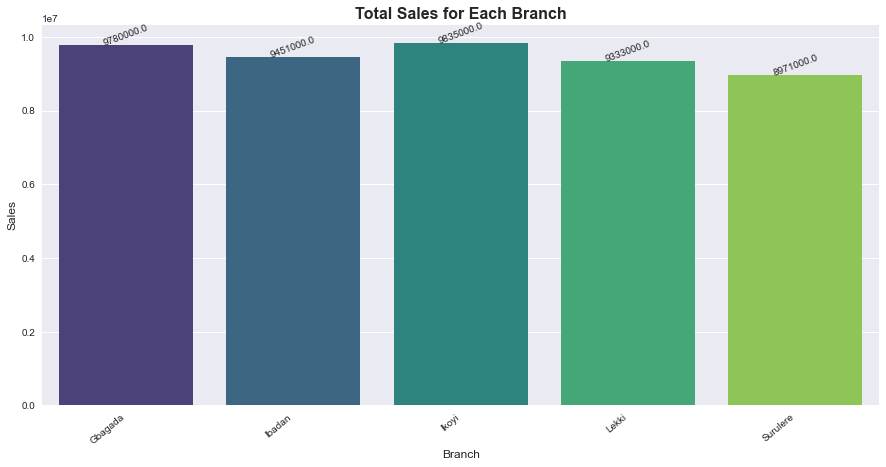

In [30]:
plot_a_barplot(branch_sales,'Branch','Sales','Total Sales for Each Branch')

## 6. Total sales for Each Date

In [31]:
date_sales = a_groupby(data,'Date','Sales')

In [32]:
date_sales

,Date,Sales
0,2015-12-03,3762000
1,2015-12-04,3588000
2,2015-12-05,3812000
3,2015-12-06,3872000
4,2015-12-07,3755000
5,2015-12-08,3558000
6,2015-12-09,3457000
7,2015-12-10,3502000
8,2015-12-11,3669000
9,2015-12-12,3862000


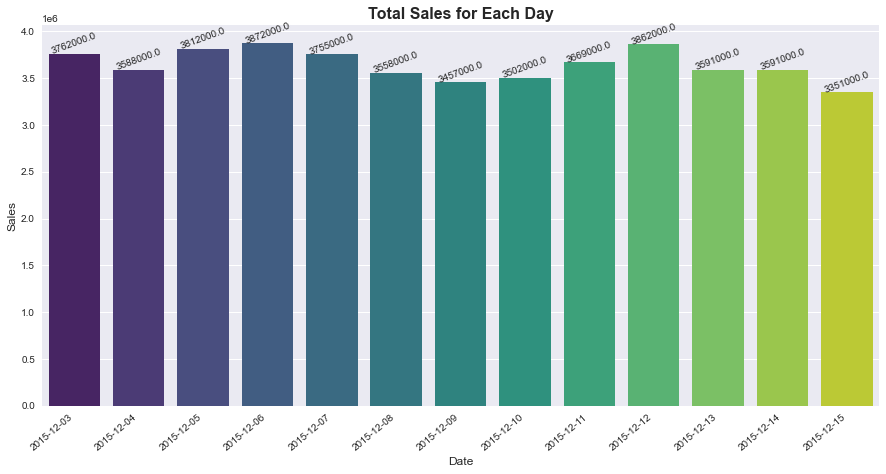

In [33]:
plot_a_barplot(date_sales,'Date','Sales','Total Sales for Each Day')

## 7. Managers with the highest Sales

In [34]:
branch_data=pd.read_excel(r'Branch-Data.xlsx' ,sheet_name='Branch Data')
branch_data

,Branch,Longitude,Lattitude,Manager
0,Ibadan,3.916700,7.396400,Adamu Sule
1,Ikoyi,3.433300,6.450000,Kasumu Joe
2,Lekki,4.116700,6.500000,Ifeoma Joseph
3,Gbagada,3.384247,6.561638,Michael Slate
4,Surulere,3.350000,6.500000,Dupe Ishola


In [35]:
managers = {'Ibadan':'Adamu Sule','Ikoyi':'Kasumu Joe','Lekki':'Ifeoma Joseph',
            'Gbagada':'Michael Slate','Surulere':'Dupe Ishola'}

In [36]:
data['Managers'] = data['Branch'].map(managers)

In [37]:
managers_sales=data.groupby('Managers')['Sales'].sum()

In [38]:
managers_sales

Managers
Adamu Sule       9451000
Dupe Ishola      8971000
Ifeoma Joseph    9333000
Kasumu Joe       9835000
Michael Slate    9780000
Name: Sales, dtype: int64

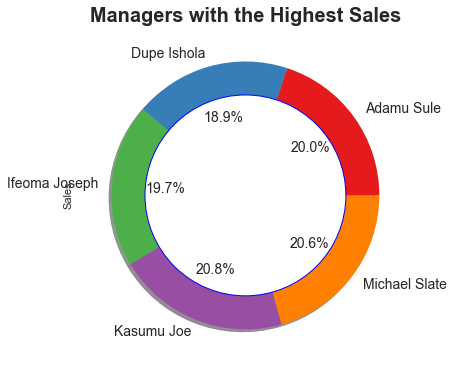

In [39]:
fig=plt.figure(figsize=(6,7))
managers_sales.plot(kind='pie',autopct='%1.1f%%',shadow=True, fontsize=14,colors=sns.color_palette('Set1'))
circle = plt.Circle((0,0),0.75,color='blue',fc='white',lw=1)
plt.gca().add_artist(circle)
plt.title('Managers with the Highest Sales',fontsize=20,weight='bold');

## 8. How many Quantities were sold on each day at Each Branch?

### At Ibadan Branch

In [40]:
ibadan = data[data['Branch']=='Ibadan']

In [41]:
# Create a function that plots a barplot
def plot_a_barplot2(data, x, y, title):
    
    data = data
    col1 = x
    col2 = y
        
    fig = plt.figure(figsize=(15,7))
    ax = sns.barplot(x=data[col1], y=data[col2], palette='magma')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
    for p in ax.patches:
        ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                    ,ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=10)
    plt.title(title,fontsize=16,weight='bold')
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

In [42]:
quantities_sold_Ibadan = a_groupby(ibadan,'Date','Quantity')

In [43]:
quantities_sold_Ibadan

,Date,Quantity
0,2015-12-03,256
1,2015-12-04,262
2,2015-12-05,229
3,2015-12-06,251
4,2015-12-07,251
5,2015-12-08,190
6,2015-12-09,244
7,2015-12-10,191
8,2015-12-11,253
9,2015-12-12,267


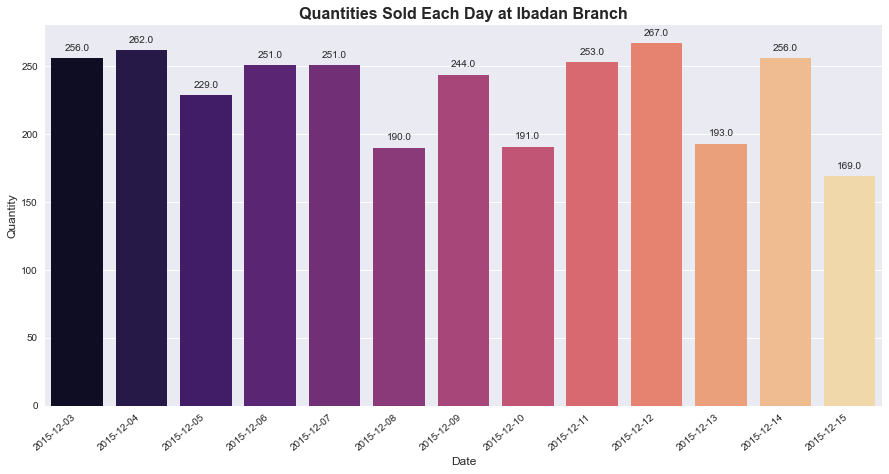

In [44]:
plot_a_barplot2(quantities_sold_Ibadan,'Date','Quantity','Quantities Sold Each Day at Ibadan Branch')

### At Ikoyi Branch

In [45]:
ikoyi = data[data['Branch']=='Ikoyi']

In [46]:
quantities_sold_Ikoyi = a_groupby(ikoyi,'Date','Quantity')

In [47]:
quantities_sold_Ikoyi

,Date,Quantity
0,2015-12-03,268
1,2015-12-04,202
2,2015-12-05,309
3,2015-12-06,242
4,2015-12-07,284
5,2015-12-08,226
6,2015-12-09,150
7,2015-12-10,228
8,2015-12-11,252
9,2015-12-12,237


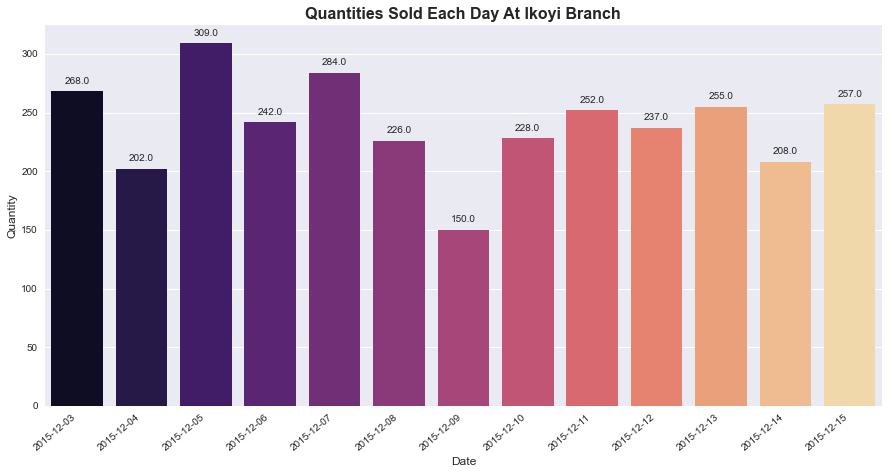

In [48]:
plot_a_barplot2(quantities_sold_Ikoyi,'Date','Quantity','Quantities Sold Each Day At Ikoyi Branch')

### At Lekki Branch

In [49]:
lekki = data[data['Branch']=='Lekki']

In [50]:
quantities_sold_Lekki = a_groupby(lekki,'Date','Quantity')

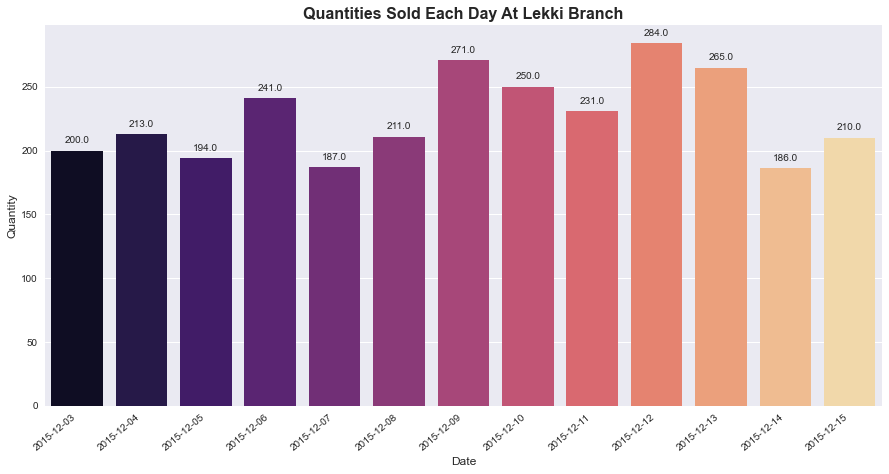

In [51]:
plot_a_barplot2(quantities_sold_Lekki,'Date','Quantity','Quantities Sold Each Day At Lekki Branch')

### At Gbagada Branch

In [52]:
gbagada = data[data['Branch']=='Gbagada']

In [53]:
quantities_sold_Gbagada = a_groupby(gbagada,'Date','Quantity')

In [54]:
quantities_sold_Gbagada

,Date,Quantity
0,2015-12-03,228
1,2015-12-04,260
2,2015-12-05,252
3,2015-12-06,243
4,2015-12-07,240
5,2015-12-08,246
6,2015-12-09,261
7,2015-12-10,232
8,2015-12-11,237
9,2015-12-12,201


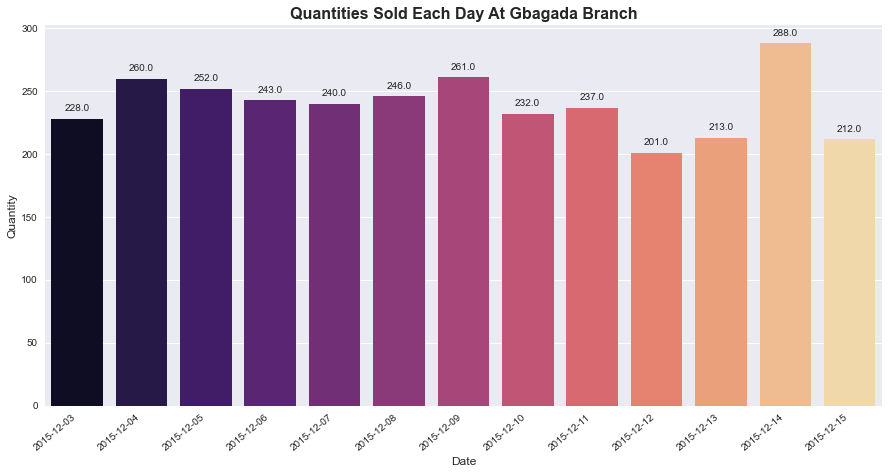

In [55]:
plot_a_barplot2(quantities_sold_Gbagada,'Date','Quantity','Quantities Sold Each Day At Gbagada Branch')

### At Surulere Branch

In [56]:
surulere = data[data['Branch']=='Surulere']

In [57]:
quantities_sold_Surulere = a_groupby(surulere,'Date','Quantity')

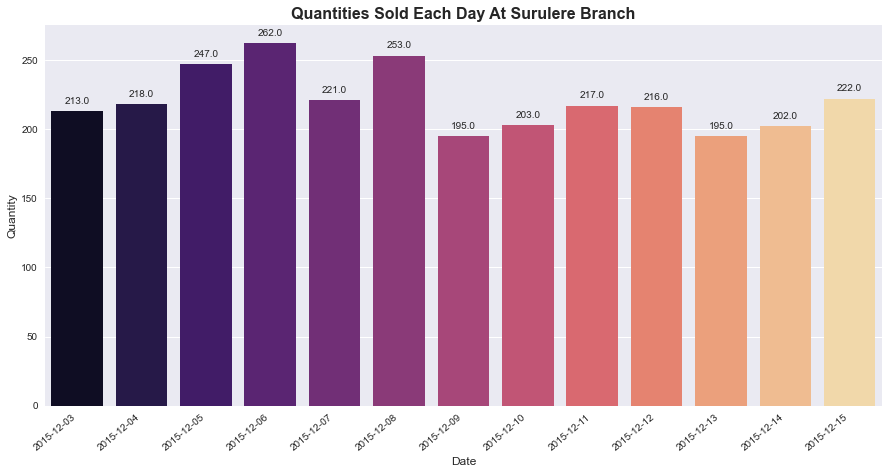

In [58]:
plot_a_barplot2(quantities_sold_Surulere,'Date','Quantity','Quantities Sold Each Day At Surulere Branch')

##  9. What Type of Pizza was Purchased More Often at Each Branch?

### At Ibadan Branch

In [59]:
ibadan_pizza = ibadan['Pizza Sold'].value_counts()

In [60]:
ibadan_pizza

Hot Pepperoni Feast    91
Chicken Feast          84
Hot Veggie             71
Chicken Bali           68
Pepperoni Suya         63
Meatzaa                60
Pepperoni Feast        60
BBQ Philly Steak       57
Chicken Suya           57
Chicken Legend         57
Beef Suya              56
BBQ Chicken            56
Veggie Supreme         56
Extravaganza           56
Margarita              54
Italiano               52
Name: Pizza Sold, dtype: int64

In [61]:
# plots a countplot
def plot_countplot(data1, data2, y, title):
    
    data1 = data1
    data2 = data2
    col = y
    
    
    fig = plt.figure(figsize=(12,10))
    ax = sns.countplot(y=data1[col],
                  order=data2.index,
                  lw=1,
                  palette='cividis',
                  edgecolor=['k']*data1[col].nunique()
                  )
    for x,y in enumerate(data2):
        ax.text(0.7,x,y,weight='bold',color='white',fontsize=12)
    plt.title(title,fontsize=16,weight='bold')

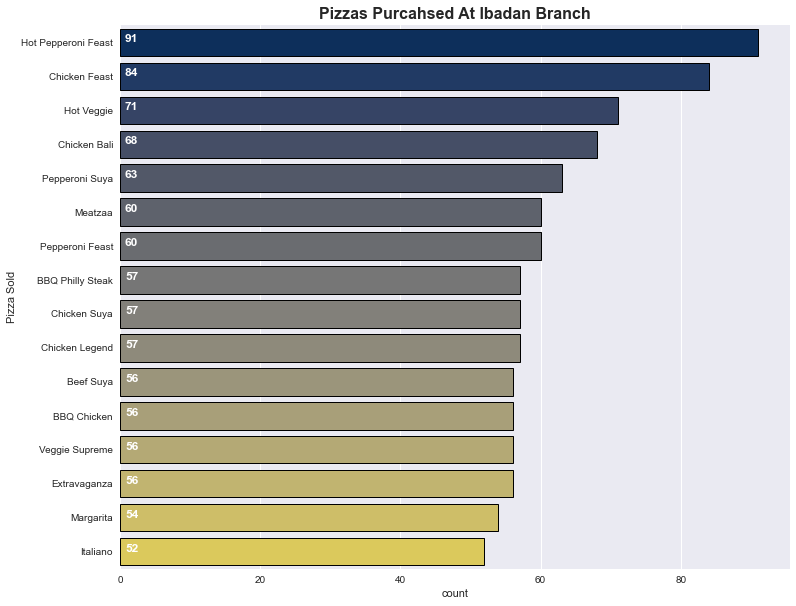

In [62]:
plot_countplot(ibadan,ibadan_pizza,'Pizza Sold','Pizzas Purcahsed At Ibadan Branch')

### At Ikoyi Branch

In [63]:
ikoyi_pizza = ikoyi['Pizza Sold'].value_counts()

In [64]:
ikoyi_pizza

Pepperoni Feast        83
Pepperoni Suya         79
Italiano               78
Hot Veggie             75
Beef Suya              74
Meatzaa                68
Veggie Supreme         67
BBQ Chicken            65
BBQ Philly Steak       65
Chicken Legend         60
Chicken Suya           60
Chicken Bali           59
Extravaganza           58
Hot Pepperoni Feast    58
Chicken Feast          57
Margarita              49
Name: Pizza Sold, dtype: int64

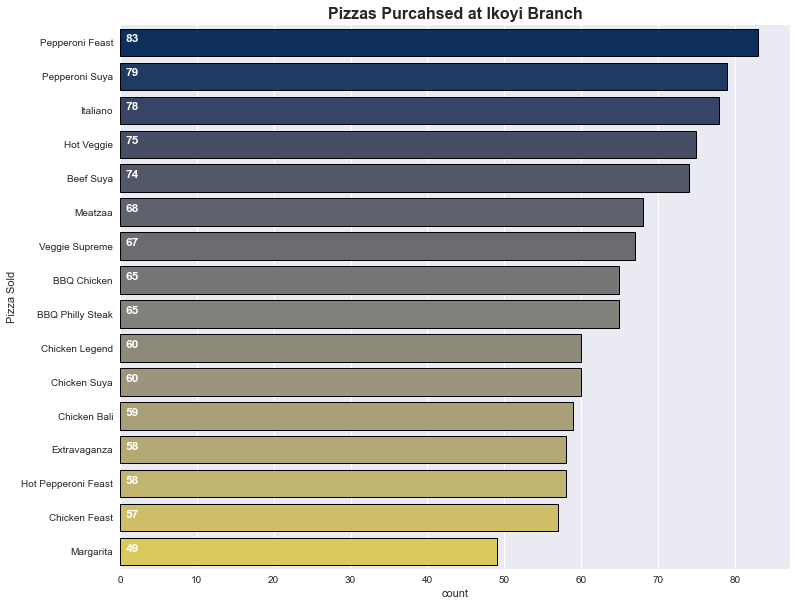

In [65]:
plot_countplot(ikoyi, ikoyi_pizza, 'Pizza Sold','Pizzas Purcahsed at Ikoyi Branch')

### At Gbagada Branch

In [66]:
gbagada_pizza = gbagada['Pizza Sold'].value_counts()

In [67]:
gbagada_pizza

Pepperoni Suya         75
Hot Veggie             73
Chicken Suya           71
Veggie Supreme         69
Italiano               69
Meatzaa                66
Chicken Feast          66
BBQ Chicken            66
BBQ Philly Steak       65
Extravaganza           65
Chicken Legend         64
Beef Suya              63
Hot Pepperoni Feast    61
Margarita              56
Chicken Bali           53
Pepperoni Feast        51
Name: Pizza Sold, dtype: int64

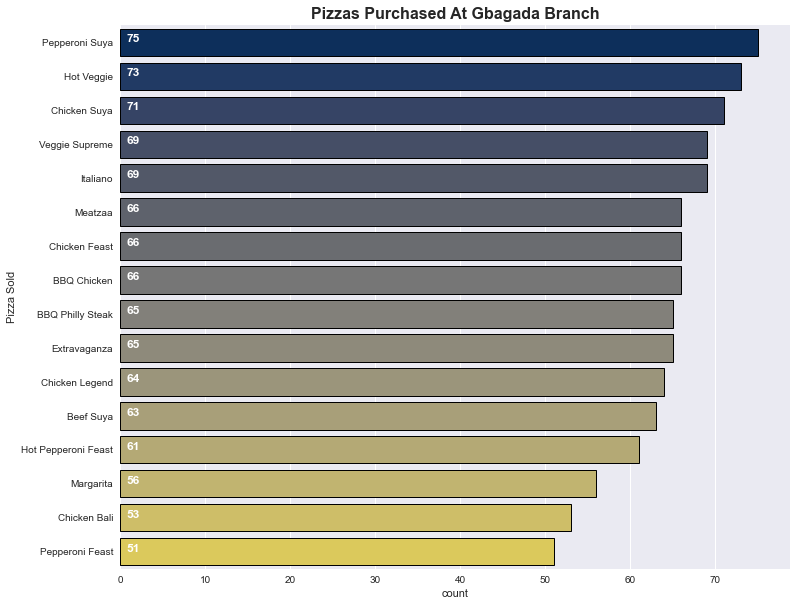

In [68]:
plot_countplot(gbagada, gbagada_pizza, 'Pizza Sold','Pizzas Purchased At Gbagada Branch')

### At Lekki Branch

In [69]:
lekki_pizza = lekki['Pizza Sold'].value_counts()

In [70]:
lekki_pizza

Veggie Supreme         77
Pepperoni Suya         77
Hot Pepperoni Feast    68
Margarita              64
Chicken Bali           64
Extravaganza           63
Italiano               62
Pepperoni Feast        62
Chicken Legend         61
BBQ Chicken            59
BBQ Philly Steak       59
Hot Veggie             58
Beef Suya              55
Chicken Suya           53
Meatzaa                51
Chicken Feast          35
Name: Pizza Sold, dtype: int64

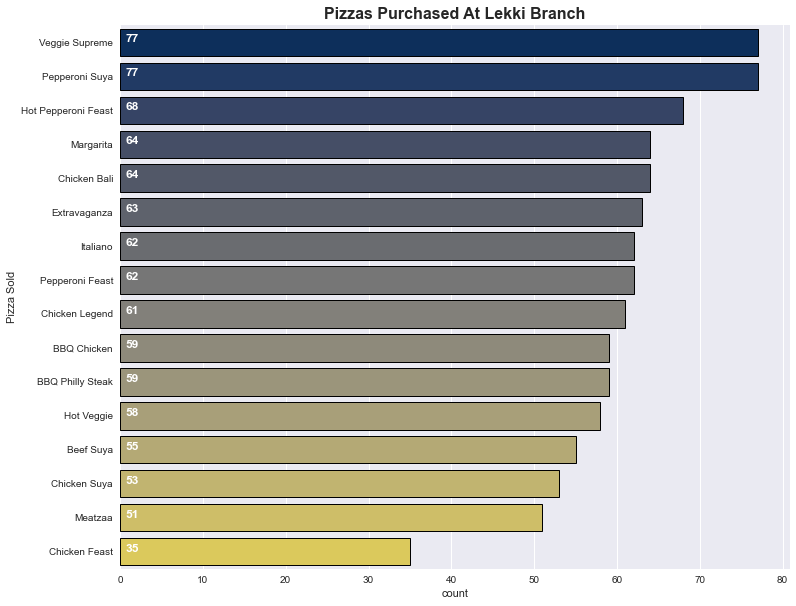

In [71]:
plot_countplot(lekki, lekki_pizza, 'Pizza Sold','Pizzas Purchased At Lekki Branch')

### At Surulere Branch

In [72]:
surulere_pizza = surulere['Pizza Sold'].value_counts()

In [73]:
surulere_pizza

Chicken Suya           70
Italiano               66
Chicken Bali           66
Beef Suya              66
BBQ Chicken            64
Pepperoni Suya         62
Margarita              61
Chicken Feast          60
Veggie Supreme         60
Hot Pepperoni Feast    59
BBQ Philly Steak       55
Pepperoni Feast        55
Extravaganza           54
Chicken Legend         53
Meatzaa                48
Hot Veggie             47
Name: Pizza Sold, dtype: int64

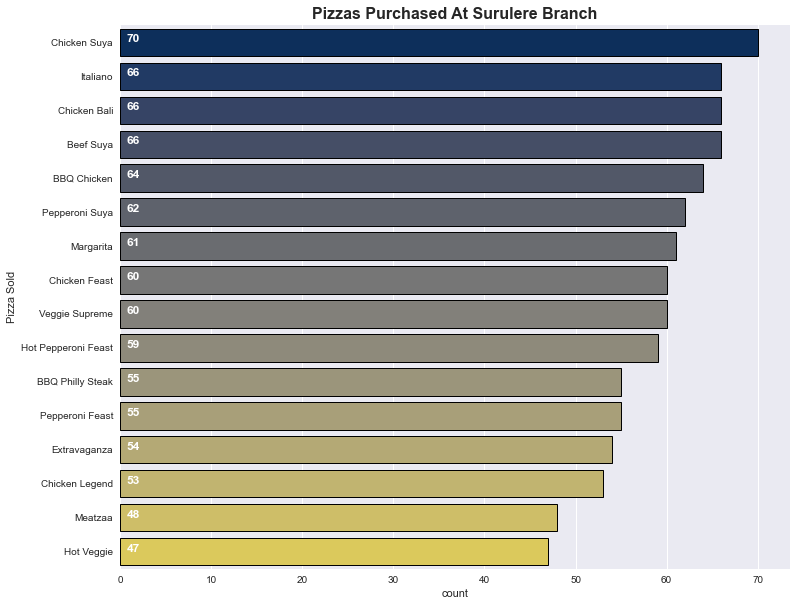

In [74]:
plot_countplot(surulere, surulere_pizza, 'Pizza Sold', 'Pizzas Purchased At Surulere Branch')

## 10. Total sales for Each Category of Pizza in Each Branch

### At Ibadan Branch

In [75]:
# Create a function that plots a barplot
def plot_a_barplot3(data, x, y, title):
    
    data = data
    col1 = x
    col2 = y
        
    fig = plt.figure(figsize=(15,7))
    ax = sns.barplot(x=data[col1], y=data[col2], palette='cividis')
    ax.set_xticklabels(ax.get_xticklabels(),ha='right')
    for p in ax.patches:
        ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                    ,ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=10)
    plt.title(title,fontsize=16,weight='bold')
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

In [76]:
ibcs = a_groupby(ibadan,'Category','Sales')

In [77]:
ibcs

,Category,Sales
0,Beef,1543000
1,Chicken,2558000
2,Pepperoni/Beef,913000
3,Salami,1888000
4,Tomato/Cheese,477000
5,Vegetable,2072000


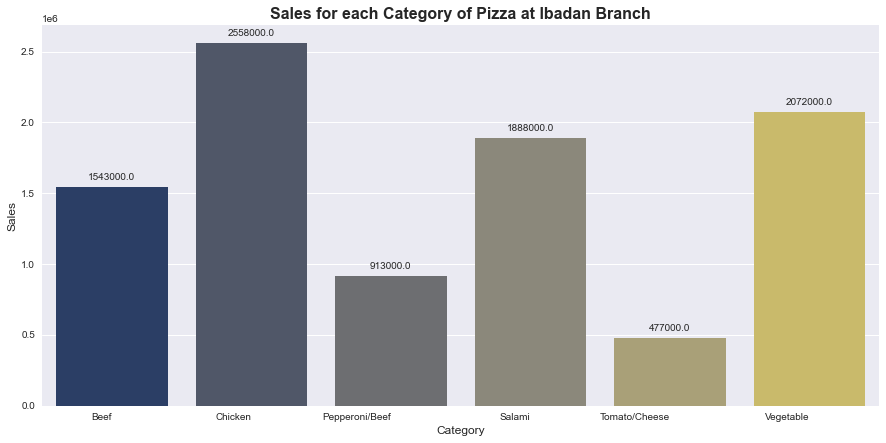

In [78]:
plot_a_barplot3(ibcs, 'Category', 'Sales', 'Sales for each Category of Pizza at Ibadan Branch')

### At Ikoyi Branch

In [79]:
ikcs = a_groupby(ikoyi,'Category','Sales')

In [80]:
ikcs

,Category,Sales
0,Beef,1820000
1,Chicken,2470000
2,Pepperoni/Beef,1077000
3,Salami,1712000
4,Tomato/Cheese,729000
5,Vegetable,2027000


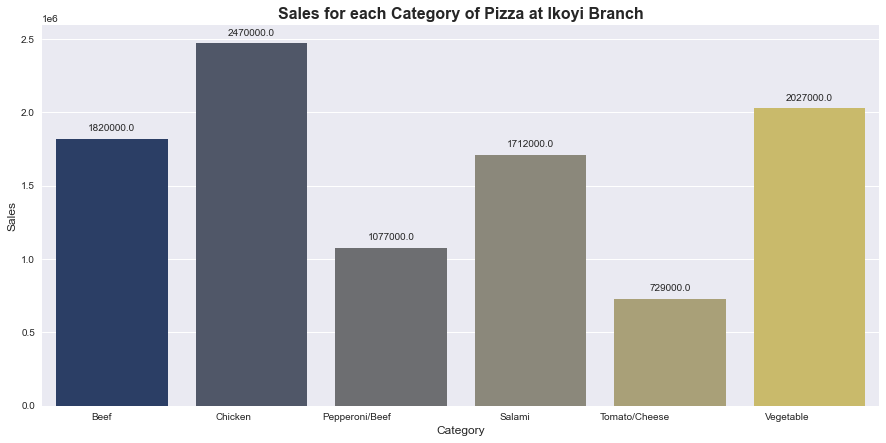

In [81]:
plot_a_barplot3(ikcs, 'Category', 'Sales', 'Sales for each Category of Pizza at Ikoyi Branch')

### At Gbagada Branch

In [82]:
gcs = a_groupby(gbagada,'Category','Sales')

In [83]:
gcs

,Category,Sales
0,Beef,1840000
1,Chicken,2698000
2,Pepperoni/Beef,1135000
3,Salami,1336000
4,Tomato/Cheese,591000
5,Vegetable,2180000


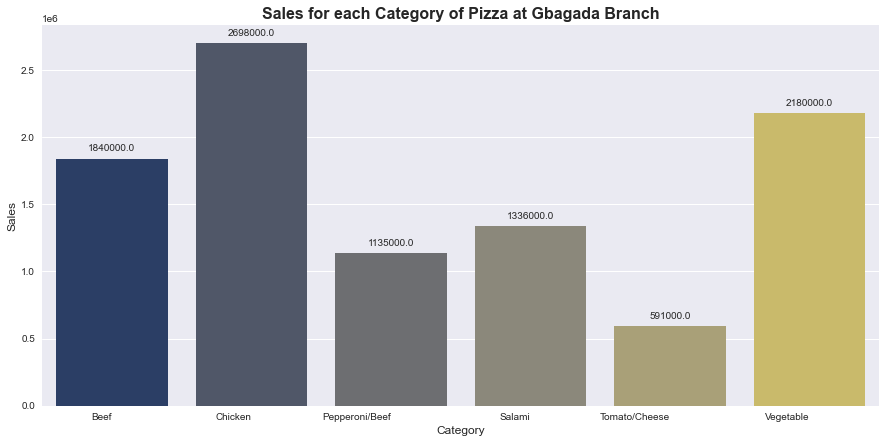

In [84]:
plot_a_barplot3(gcs, 'Category', 'Sales', 'Sales for each Category of Pizza at Gbagada Branch')

### At Lekki Branch

In [85]:
lcs = a_groupby(lekki,'Category','Sales')

In [86]:
lcs

,Category,Sales
0,Beef,1553000
1,Chicken,2316000
2,Pepperoni/Beef,1057000
3,Salami,1640000
4,Tomato/Cheese,567000
5,Vegetable,2200000


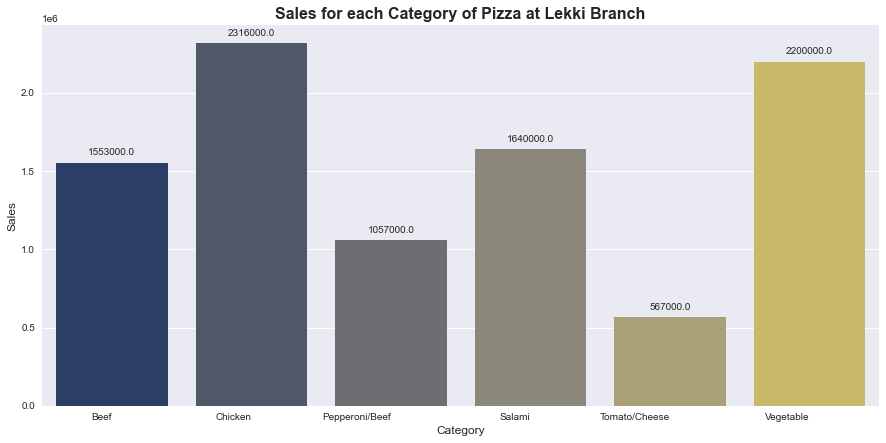

In [87]:
plot_a_barplot3(lcs, 'Category', 'Sales', 'Sales for each Category of Pizza at Lekki Branch')

### At Surulere

In [88]:
scs = a_groupby(surulere,'Category','Sales')

In [89]:
scs

,Category,Sales
0,Beef,1671000
1,Chicken,2670000
2,Pepperoni/Beef,863000
3,Salami,1344000
4,Tomato/Cheese,591000
5,Vegetable,1832000


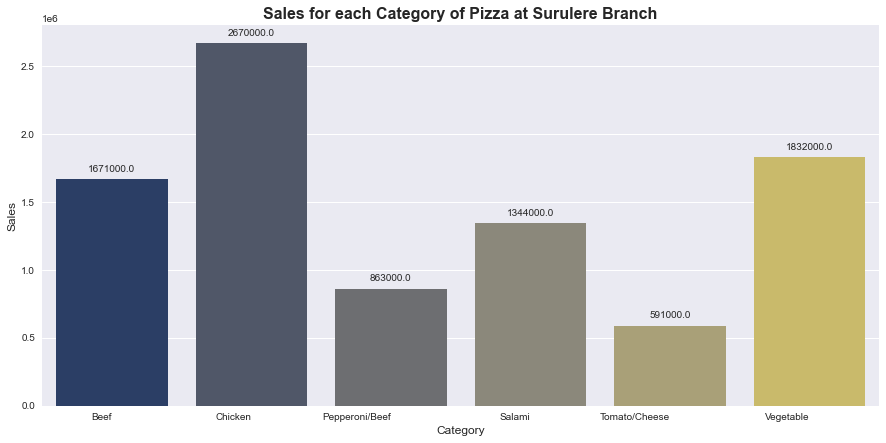

In [90]:
plot_a_barplot3(scs, 'Category', 'Sales', 'Sales for each Category of Pizza at Surulere Branch')

## 11. Total sales for Pizza Sold in Each Branch

### At Ibadan Branch

In [91]:
ibadan_sales = a_groupby(ibadan,'Pizza Sold','Sales')

In [92]:
ibadan_sales

,Pizza Sold,Sales
0,BBQ Chicken,668000
1,BBQ Philly Steak,700000
2,Beef Suya,507000
3,Chicken Bali,400000
4,Chicken Feast,464000
5,Chicken Legend,346000
6,Chicken Suya,680000
7,Extravaganza,346000
8,Hot Pepperoni Feast,1156000
9,Hot Veggie,836000


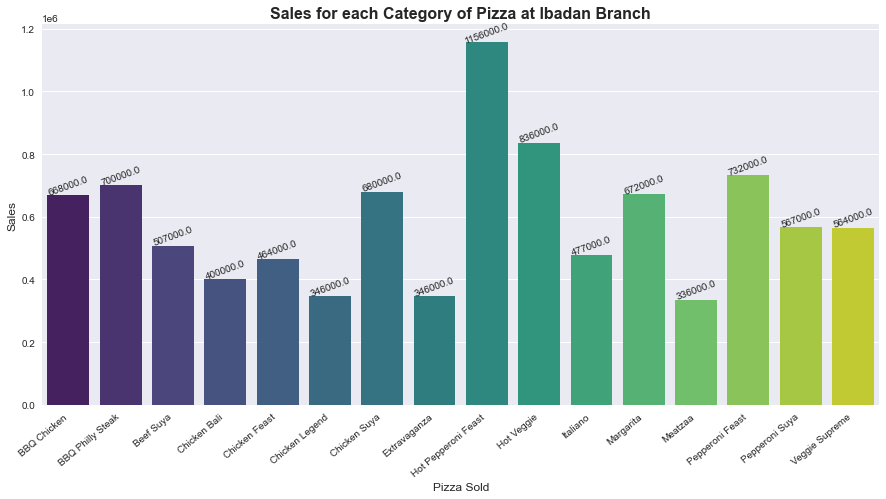

In [93]:
plot_a_barplot(ibadan_sales, 'Pizza Sold', 'Sales', 'Sales for each Category of Pizza at Ibadan Branch')

### At Ikoyi Branch

In [94]:
ikoyi_sales = a_groupby(ikoyi,'Pizza Sold','Sales')

In [95]:
ikoyi_sales

,Pizza Sold,Sales
0,BBQ Chicken,696000
1,BBQ Philly Steak,764000
2,Beef Suya,684000
3,Chicken Bali,348000
4,Chicken Feast,324000
5,Chicken Legend,342000
6,Chicken Suya,760000
7,Extravaganza,324000
8,Hot Pepperoni Feast,760000
9,Hot Veggie,852000


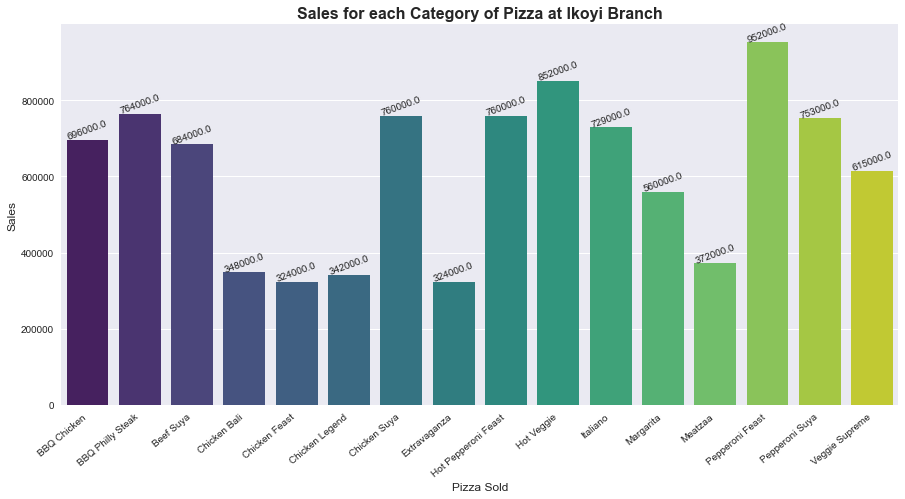

In [96]:
plot_a_barplot(ikoyi_sales, 'Pizza Sold', 'Sales', 'Sales for each Category of Pizza at Ikoyi Branch')

### At Gbagada Branch

In [97]:
gbagada_sales = a_groupby(gbagada,'Pizza Sold','Sales')

In [98]:
gbagada_sales

,Pizza Sold,Sales
0,BBQ Chicken,764000
1,BBQ Philly Steak,864000
2,Beef Suya,588000
3,Chicken Bali,296000
4,Chicken Feast,388000
5,Chicken Legend,366000
6,Chicken Suya,884000
7,Extravaganza,394000
8,Hot Pepperoni Feast,804000
9,Hot Veggie,864000


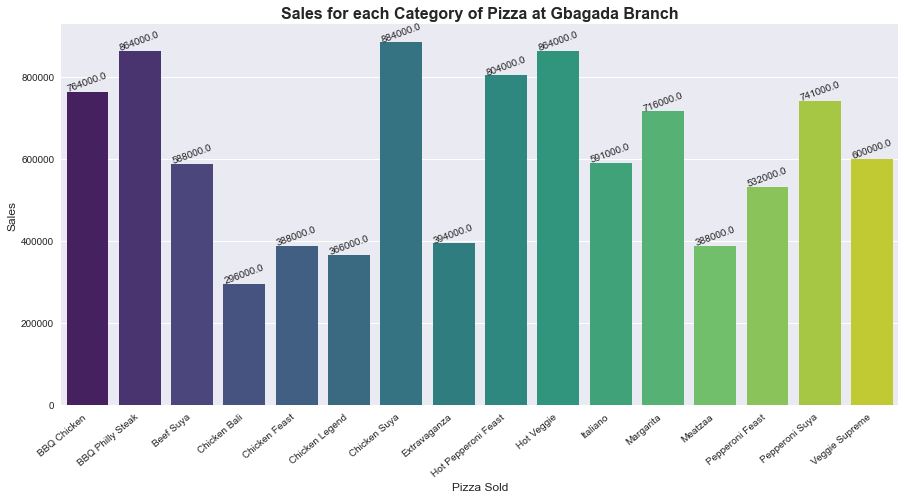

In [99]:
plot_a_barplot(gbagada_sales, 'Pizza Sold', 'Sales', 'Sales for each Category of Pizza at Gbagada Branch')

### At Lekki Branch

In [100]:
lekki_sales = a_groupby(lekki,'Pizza Sold','Sales')

In [101]:
lekki_sales

,Pizza Sold,Sales
0,BBQ Chicken,760000
1,BBQ Philly Steak,688000
2,Beef Suya,561000
3,Chicken Bali,334000
4,Chicken Feast,216000
5,Chicken Legend,374000
6,Chicken Suya,632000
7,Extravaganza,388000
8,Hot Pepperoni Feast,860000
9,Hot Veggie,712000


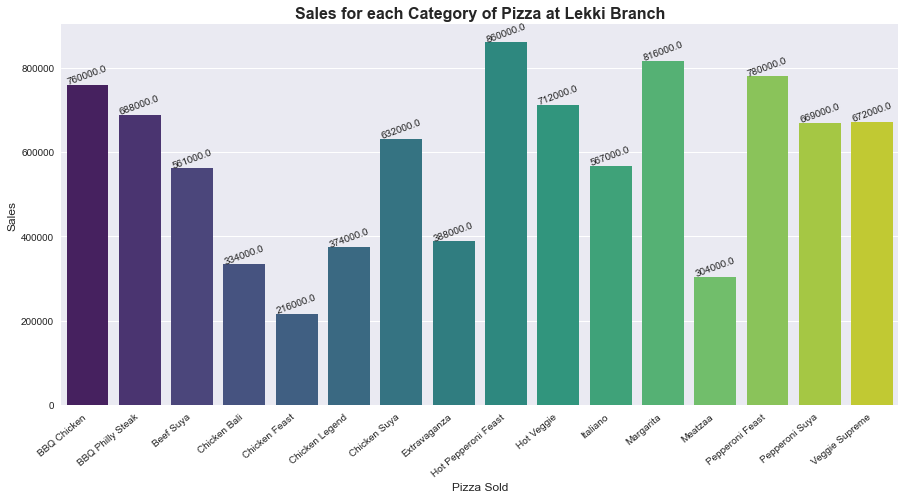

In [102]:
plot_a_barplot(lekki_sales, 'Pizza Sold', 'Sales', 'Sales for each Category of Pizza at Lekki Branch')

### At Surulere Branch

In [103]:
surulere_sales = a_groupby(surulere,'Pizza Sold','Sales')

In [104]:
surulere_sales

,Pizza Sold,Sales
0,BBQ Chicken,712000
1,BBQ Philly Steak,792000
2,Beef Suya,603000
3,Chicken Bali,400000
4,Chicken Feast,352000
5,Chicken Legend,338000
6,Chicken Suya,868000
7,Extravaganza,362000
8,Hot Pepperoni Feast,712000
9,Hot Veggie,536000


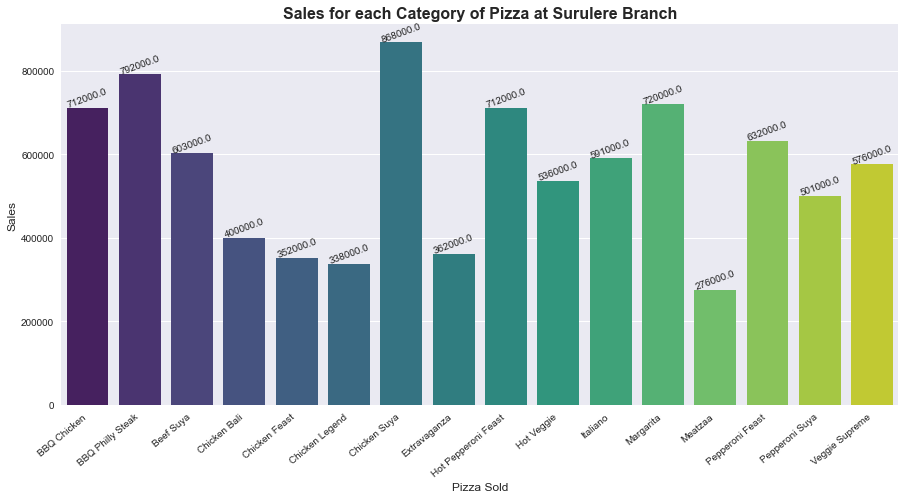

In [105]:
plot_a_barplot(surulere_sales, 'Pizza Sold', 'Sales', 'Sales for each Category of Pizza at Surulere Branch')

## 12. Total sales For Each Date In Each Branch

### At Ibadan Branch

In [106]:
# Create a function that plots a barplot
def plot_a_barplot4(data, x, y, title):
    
    data = data
    col1 = x
    col2 = y
        
    fig = plt.figure(figsize=(15,7))
    ax = sns.barplot(x=data[col1], y=data[col2], palette='inferno')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')
    for p in ax.patches:
        ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height())
                    ,ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=10)
    plt.title(title,fontsize=16,weight='bold')
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

In [107]:
sales_per_day_ibadan = ibadan.groupby('Date')['Sales'].sum().reset_index()

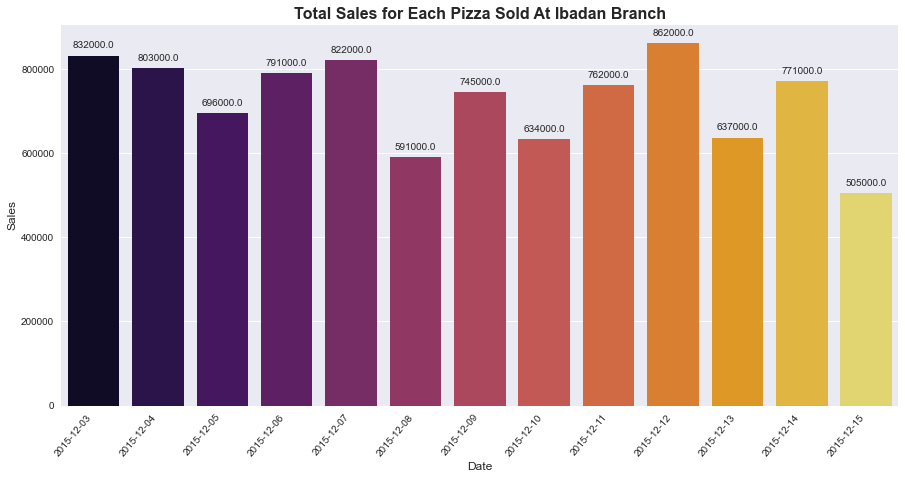

In [108]:
plot_a_barplot4(sales_per_day_ibadan, 'Date','Sales','Total Sales for Each Pizza Sold At Ibadan Branch')

### At Ikoyi Branch

In [109]:
sales_per_day_ikoyi = ikoyi.groupby('Date')['Sales'].sum().reset_index()

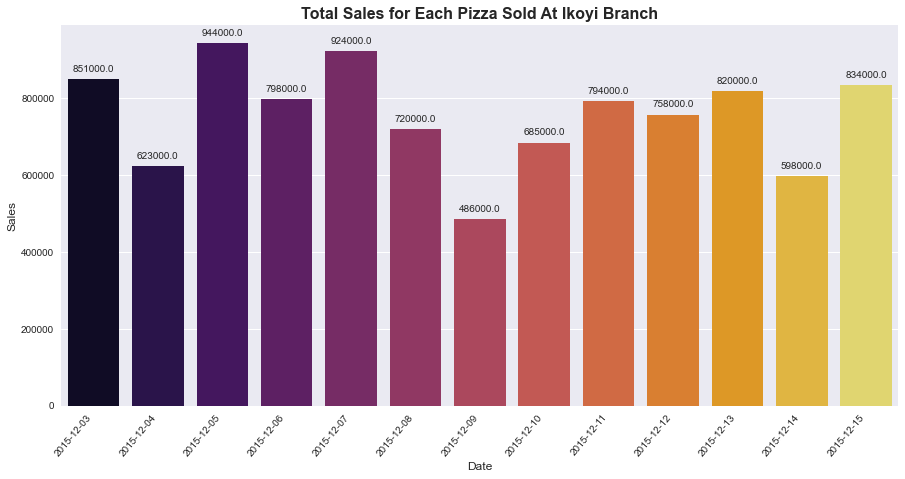

In [110]:
plot_a_barplot4(sales_per_day_ikoyi, 'Date','Sales','Total Sales for Each Pizza Sold At Ikoyi Branch')

### At Gbagada Branch

In [111]:
sales_per_day_gbagada = gbagada.groupby('Date')['Sales'].sum().reset_index()

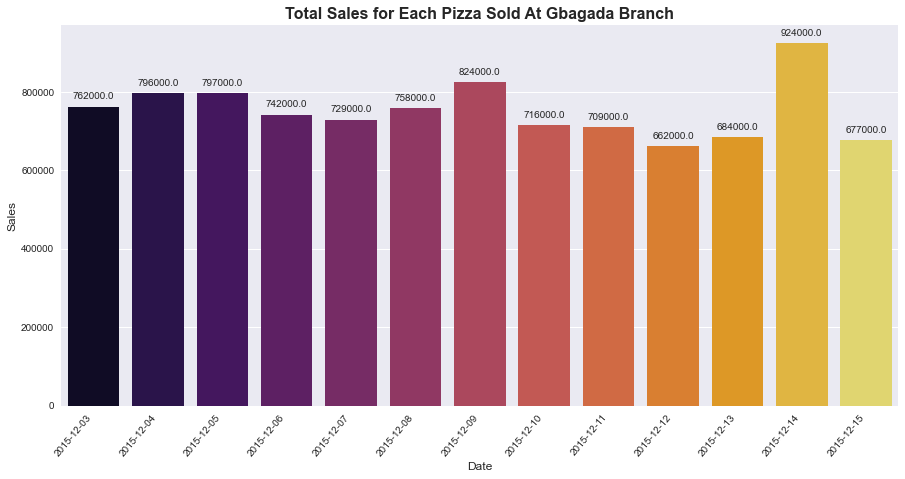

In [112]:
plot_a_barplot4(sales_per_day_gbagada, 'Date','Sales','Total Sales for Each Pizza Sold At Gbagada Branch')

### At Lekki Branch

In [113]:
sales_per_day_lekki = lekki.groupby('Date')['Sales'].sum().reset_index()

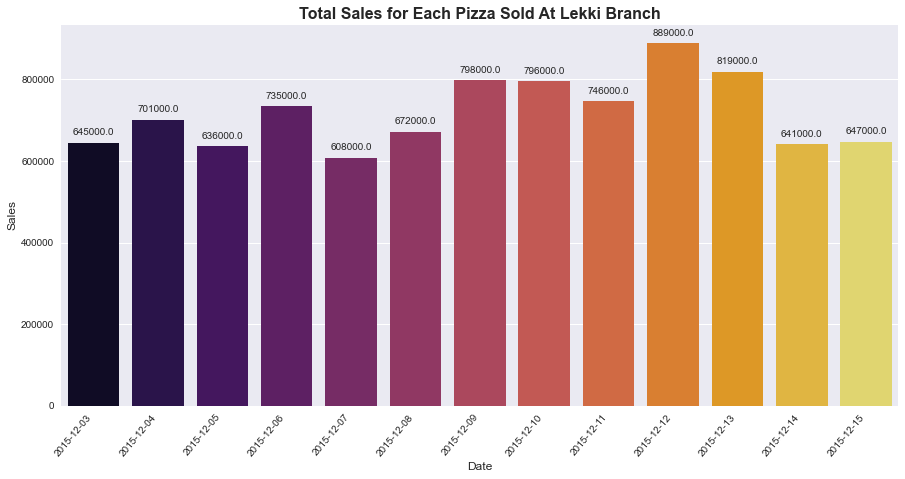

In [114]:
plot_a_barplot4(sales_per_day_lekki, 'Date','Sales','Total Sales for Each Pizza Sold At Lekki Branch')

### At Surulere Branch

In [115]:
sales_per_day_surulere = surulere.groupby('Date')['Sales'].sum().reset_index()

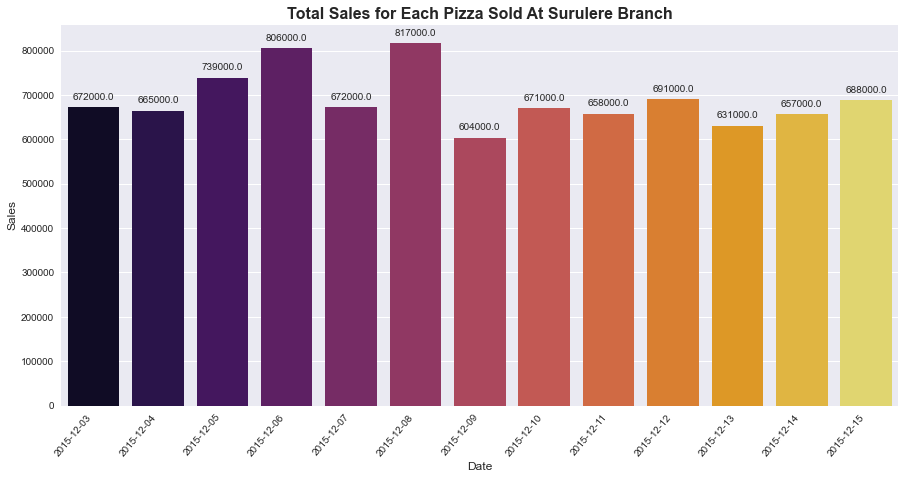

In [116]:
plot_a_barplot4(sales_per_day_surulere, 'Date','Sales','Total Sales for Each Pizza Sold At Surulere Branch')

In [117]:
data

,S/N,Date,Branch,Pizza Sold,Category,Price,Quantity,Time,Time Range,Sales,Managers
0,1,2015-12-11,Ibadan,Meatzaa,Beef,2000,5,0 days 08:00:01,Before 9:00am,10000,Adamu Sule
1,2,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,4,0 days 08:00:02,Before 9:00am,8000,Kasumu Joe
2,3,2015-12-04,Lekki,BBQ Chicken,Chicken,4000,5,0 days 08:00:04,Before 9:00am,20000,Ifeoma Joseph
3,4,2015-12-14,Ikoyi,Extravaganza,Pepperoni/Beef,2000,1,0 days 08:00:07,Before 9:00am,2000,Kasumu Joe
4,5,2015-12-07,Gbagada,Meatzaa,Beef,2000,4,0 days 08:00:08,Before 9:00am,8000,Michael Slate
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2015-12-13,Lekki,Margarita,Vegetable,4000,1,0 days 09:42:28,After 9:00am,4000,Ifeoma Joseph
4996,4997,2015-12-07,Surulere,Beef Suya,Beef,3000,5,0 days 09:42:31,After 9:00am,15000,Dupe Ishola
4997,4998,2015-12-07,Ikoyi,Pepperoni Suya,Pepperoni/Beef,3000,4,0 days 09:42:32,After 9:00am,12000,Kasumu Joe
4998,4999,2015-12-08,Gbagada,Italiano,Tomato/Cheese,3000,1,0 days 09:42:32,After 9:00am,3000,Michael Slate


# Findings From The Analysis.



I performed analysis on each branch; analysis like, quantities sold per day for each branch, categories, and pizza types that were ordered more often and sales generated by the categories and types of pizza in each branch



### At Ibadan Branch:

On the **12th and 4th of December**, the **Ibadan** branch sold more quantities 267 and 262 respectively. Also, on the **12th**, they made N862,000 in sales while **3rd and 4th** followed suit making N832,000 and N822,000 in sales. The types of Pizza ordered more often were **Hot Pepperoni Feast, Chicken Feast, and Hot Veggie**. However, that was not the case in the sales made in these types of pizza. **Hot Pepperoni Feast** made more sales, followed by **Hot Veggie**, then **Pepperoni Feast**.


I did more analysis on the prices of each pizza types and I found out that **Pepperoni Feast** cost N4,000 while **Chicken Feast** cost N2,000 for a box of pizza. Sixty(60) quantities of **Pepperoni Feast** and eighty-four(84) quantities of **Chicken Feast** were ordered during this period. (Do the Maths to be sure).


while the categories of pizza that drove more sales were **Chicken** with a total sale of N2,558,000. Followed by **Vegetables** with a total sale of N2,072,000.







### At Ikoyi Branch:

More quantities were sold on the **5th and 7th**, 309 and 284 respectively. Total sales made on each of these dates were N944,000 and N924,000 respectively. Types of pizza ordered more often from highest were **Pepperoni Feast(83), Pepperoni Suya(79), Italiano(78), Hot Veggie(75), and Beef Suya(74)**. 



However, in sales, that was not the case; **Pepperoni Feast(N962,000), Hot Veggie(N852,000), BBQ Philly Steak(N764,000)**, while **Chicken Suya and Hot Pepperoni Feast** made a total sale of N760,000 each. **Pepperoni Suya** that had more quantities only made N753,000 in sales. This is because all other pizza types that made more sales than **Pepperoni Suya** cost N4,000 for a box of pizza while **Pepperoni Suya** cost just N3,000.



The categories of pizza that drove more sales were **Chicken** with a total sale of N2,470,000 while **Vegetables** made N2,027,000 in sales.







### At Gbagaga Branch:

On the **14th, 9th, and 4th of December**, **Gbagaga** branch sold 288, 261, and 260 quantities respectively. Also, on the **14th**, they made N924,000 in sales while **9th, 5th, and 4th** followed suit making N824,000, N797,000, and N796,000 in sales. The types of Pizza ordered more often were **Pepperoni Suya(75), Hot Veggie(73), and Chicken Suya(71)**. However, that was not the case in the sales made in these types of pizza. **Chicken Suya(N884,000)** made more sales, followed by **Hot Veggie and BBQ Philly Steak(N864,000)**, then **Hot Pepperoni Feast(N804,000)**.



You would notice **Pepperoni Suya** is not among the top 4 types of pizza that made great sales. This is because it costs just N3,000 for a box of pizza.



while the categories of pizza that drove more sales were **Chicken** with a total sale of N2,698,000. Followed by **Vegetables** with a total sale of N2,180,000.







### At Lekki Branch

Top 3 dates that sold more quantities were; **12th, 9th, and 13th**. Quantities sold were 284, 271, and 265 respectively. Total sales made on **12th and 13th** were N889,000 and N819,000 respectively. However, on the **9th** the sales(N798,000) were low compared to the quantities sold, this is due to the prices of different types of pizza purchased. Types of pizza ordered more often from highest were **Pepperoni Suya(77), Veggie Supreme(77), and Hot Pepperoni Feast(68).



Although, that was not the case in sales; **Hot Pepperoni Feast(N860,000), Margarita(N816,000), Pepperoni Feast(N780,000)**. **Pepperoni Suya and Veggie Supreme** that had more quantities only made N669,000 and N672,000 respectively in sales. This is because all other pizza types that made more sales than **Pepperoni Suya and Veggie Supreme** cost N4,000 for a box of pizza while **Pepperoni Suya and Veggie Supreme** cost just N3,000 each for a box of pizza.



The categories of pizza that drove more sales were **Chicken** with a total sale of N2,316,000 while **Vegetables** made N2,200,000 in sales. However, there's little difference in sales between these two categories in this branch this is because there was a high sale for **Margarita** pizza. Most times people who order **Margarita** preferred **Vegetables** as the category(I think we have more people that love vegetables in that location).







### At Surulere Branch

On the **6th, 8th, and 5th of December**, **Surulere** branch sold more quantities 262,253 and 247 respectively. Also, on the **8th**, they made N817,000 in sales while **6th and 5th** followed suit making N806,000 and N739,000 in sales. The types of Pizza ordered more often were **Chicken Suya(70), Chicken Bali, Beef Suya, and Italiano(66 quantities each), and BBQ Chicken(64)**. **Chicken Suya** made N868,000 in sales, followed by **BBQ Philly Steak(N792,000), BBQ Chicken, and Hot Pepperoni Feast** made N712,000 each in sales.



However, from the visualization you would notice that **Chicken Bali, Beef Suya, and Italiano** are not in the top 7 of pizza types that drove sales despite been ordered often. Again this is due to the prices of these pizzas**Chicken Bali** cost N2,000, **Beef Suya** cost N3,000 while **Italiano** cost N3,000 for a box of pizza.



while the categories of pizza that drove more sales were **Chicken** with a total sale of N2,670,000. Followed by **Vegetables** with a total sale of N1,832,000.





### In General:



1. On the **5th and 6th of December 2015**, Dominos Pizza sold 1,231 and 1,239 quantities of pizza respectively which happens to be the highest quantities sold on any day during this period. Also on the **11th and 12th of the same month**, quantities of pizza sold were 1,119 and 1,205 respectively. However, there was no day during this period in which they sold less than a thousand quantities.





2. **Ikoyi, Gbagada*, and *Ibadan** Branch were the top three branches that sold more quantities of pizza. **Ikoyi** sold 3,118, **Gbagada** sold 3,113 and **Ibadan** sold 3,012. **Lekki and Surulere** Branch sold less than 3,000 quantities each.





3. It didn't come as a surprise that **Chicken** under the category of pizza was purchased more, With a total sale of N12,712,000 across all branches. The category of pizza that performed well in sales after **Chicken** was **Vegetables**(lol...this came as a surprise to me tho) with total sales of N10,311,000. However, **Tomato/Cheese** was the lowest with total sales of N2,955,000 across all branches.





4. Domino sold different types of pizzas during this period, they were: **Pepperoni Suya, Hot Pepperoni Feast, Veggie Supreme, Italiano, Hot Veggie, Beef Suya, Chicken Suya, Pepperoni Feast, Chicken Bali, BBQ Chicken, Chicken Feast, BBQ Philly Steak, Extravaganza, Chicken Legend, Meatzaa, and Margarita**.
    
    My Favourite is **Chicken Suya**. Although, **Hot Pepperoni Feast** had the highest sales with N4,292,000. Followed by the **Chicken Suya**, **BBQ Philly Steak**, and the **Hot Veggie** with total sales of N3,824,000, N3,808,000 and N3,800,000 respectively. 
    
    All types of pizza with **"chicken"** did really poor in sales expect **Chicken Suya**. **Meatzaa** had the lowest sales across all branches with a total sale of N1,676,000.

   

   

5. It shouldn't come as a surprise that **Ikoyi** branch had the Highest sale amongst the other branches with a total sale of N9,835,000. This is because they sold more quantities of pizza. **Gbagada and Ibadan** made N9,780,000 and N9,451,000 in sales respectively. 





6. Surprisingly, quantities sold across all branches on the **12th of December** was 1,205. However, on this same day a total sale across all branches was N3,862,000. But quantities sold on the **5th of December** was 1,231 had a total sale of N3,812,000.

   

  Although, on the **6th of December 2015**, quantities sold in all branches was 1,239 and on this same day, a total sale of N3,872,000 was made across all branches.

   

### Branches and their Managers  

 

| Branch | Managers |
|----:|:----:|
| Ibadan | Adamu Sule |
| Ikoyi | Kasumu Joe |
| Lekki | Ifeoma Joseph |
| Gbagada | Michael Slate |
| Surulere | Dupe Ishola |





From our branch with the highest sales, we can map the analysis with the respective managers to know the manager with the highest sales. **Kasumu Joe** the branch Manager from **Ikoyi branch** had the highest sale, followed by **Michael Slate of Gbagada branch** and **Adamu Sule of Ibadan branch**.

## Thank You for viewing!!!
